# Research on car sales ads

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day.

You need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

## Open the data file and study the general information. 

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [42]:
vehicles=pd.read_csv('/datasets/vehicles_us.csv')
print(vehicles.head(10))

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   
5  14990      2014.0    chrysler 300  excellent        6.0  gas   57954.0   
6  12990      2015.0    toyota camry  excellent        4.0  gas   79212.0   
7  15990      2013.0     honda pilot  excellent        6.0  gas  109473.0   
8  11500      2012.0     kia sorento  excellent        4.0  gas  104174.0   
9   9200      2008.0     honda pilot  excellent        NaN  gas  147191.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automat

In [43]:
print(vehicles.info())
print(vehicles.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB
None
               price    model_year     cylinders       odometer   is_4wd  \
count   51525.000000  47906.000000  46265.000000   43633.000000  25572.0   
mean    12132.464920   2009.750470      6.125235  115553.461738      1.0   
std     10040.803015      6.282065      1.660360   65094.611341      0.0   
min         1.000000   1

In [44]:
print(vehicles['model'].unique())
print(vehicles.groupby(by='model')['price'].count())

['bmw x5' 'ford f-150' 'hyundai sonata' 'chrysler 200' 'chrysler 300'
 'toyota camry' 'honda pilot' 'kia sorento' 'chevrolet silverado 1500'
 'honda accord' 'ram 1500' 'gmc yukon' 'jeep cherokee'
 'chevrolet traverse' 'hyundai elantra' 'chevrolet tahoe' 'toyota rav4'
 'chevrolet silverado' 'jeep wrangler' 'chevrolet malibu' 'ford fusion se'
 'chevrolet impala' 'chevrolet corvette' 'jeep liberty' 'toyota camry le'
 'nissan altima' 'subaru outback' 'toyota highlander' 'dodge charger'
 'toyota tacoma' 'chevrolet equinox' 'nissan rogue'
 'mercedes-benz benze sprinter 2500' 'honda cr-v' 'jeep grand cherokee'
 'toyota 4runner' 'ford focus' 'honda civic' 'kia soul'
 'chevrolet colorado' 'ford f150 supercrew cab xlt'
 'chevrolet camaro lt coupe 2d' 'chevrolet cruze' 'ford mustang'
 'chevrolet silverado 3500hd' 'nissan frontier crew cab sv'
 'subaru impreza' 'jeep grand cherokee laredo' 'nissan versa'
 'ford f-250 sd' 'chevrolet silverado 1500 crew' 'ford f250 super duty'
 'chevrolet camaro' 'f

In [45]:
print(vehicles['type'].value_counts())
print(vehicles['transmission'].value_counts())
print(vehicles['fuel'].value_counts())
print(vehicles['condition'].value_counts())

SUV            12405
truck          12353
sedan          12154
pickup          6988
coupe           2303
wagon           1541
mini-van        1161
hatchback       1047
van              633
convertible      446
other            256
offroad          214
bus               24
Name: type, dtype: int64
automatic    46902
manual        2829
other         1794
Name: transmission, dtype: int64
gas         47288
diesel       3714
hybrid        409
other         108
electric        6
Name: fuel, dtype: int64
excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64


### Conclusion

After studying general information, we can see that out of 13 columns in our data, 5 has missing values. The column with the information of whether the vehicle has a 4-wheel drive has 50% missing data, but the type of data is boolean. Other columns with missing values have 7 - 18 % of missing data. 
There are no missing values in price or model columns therefore it might be that missing values in other columns are the result of people omitting some information in their adds.
Unfortunately, based on the other information about the car in the add (like model  and date of the add, type and etc.), we can't fillin missing values using open sources from the internet. 
For example the same model could've been prodused within 5 years time period. 
As a result other columns require further investigation.

## Data preprocessing

### Boolean column

We start our data preprocessing from the is_4wd column. Values in the column are boolean, where 1 means the vehicle has 4-wheel drive and 0 - it doesn't. Therefore we can assume that all missing values are 0 - which means no 4-wheel drive.
We will change data type to be boolean as well for convenience.

In [46]:
#filling missing values with 0:
vehicles['is_4wd'].fillna(0, inplace=True)

#assign values type as boolean
vehicles['is_4wd'] =vehicles['is_4wd'].astype('bool')
print(vehicles['is_4wd'].value_counts())

False    25953
True     25572
Name: is_4wd, dtype: int64


In [47]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          51525 non-null bool
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: bool(1), float64(3), int64(2), object(7)
memory usage: 4.8+ MB


### Model year

This column has less than 10% of the missing values and can be filled with the median. 
Also, the year is an integer value, we will change the column type right away.

In [48]:
vehicles['model_year'] = vehicles.groupby('model')['model_year'].transform(lambda grp:grp.fillna(grp.mode()[0]))
vehicles['model_year'] =vehicles['model_year'].astype('int')
print(vehicles['model_year'].value_counts())

2013    4087
2014    3868
2012    3813
2015    3761
2011    3604
        ... 
1955       1
1961       1
1949       1
1954       1
1936       1
Name: model_year, Length: 68, dtype: int64


### Odometer column

Odometer column has more than 10% values of the missing data, but missing data in this column can be filled with median based on years and type.

In [49]:
vehicles['odometer']=vehicles['odometer'].fillna(vehicles.groupby(['model_year','model'])['odometer'].transform('median'))
print(vehicles['odometer'].isnull().sum())
vehicles['odometer'].fillna(0, inplace=True)
vehicles.loc[vehicles['odometer'] ==0, 'odometer'] =vehicles['odometer'].median()
print(vehicles['odometer'].isnull().sum())
print(vehicles['odometer'].describe())

83
0
count     51525.000000
mean     115764.775885
std       62206.386620
min           1.000000
25%       73000.000000
50%      113703.000000
75%      153000.000000
max      990000.000000
Name: odometer, dtype: float64


### Cylinders column

According to the various databases including ours, we can assume that for each model a certain amount of cylinders will be more common than any other.
We'll use mode to fill in the data.

In [50]:
print(vehicles['cylinders'].value_counts())
print(vehicles.pivot_table(index='model',values='cylinders'))

8.0     15844
6.0     15700
4.0     13864
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64
                   cylinders
model                       
acura tl            5.971564
bmw x5              6.406375
buick enclave       6.000000
cadillac escalade   7.986395
chevrolet camaro    6.887097
...                      ...
toyota sienna       5.952381
toyota tacoma       5.345205
toyota tundra       7.919561
volkswagen jetta    4.281116
volkswagen passat   4.325949

[100 rows x 1 columns]


In [51]:

print(vehicles.groupby(['model','model_year'])['cylinders'].agg(pd.Series.mode))


model              model_year
acura tl           1999          6
                   2001          6
                   2002          6
                   2003          6
                   2004          6
                                ..
volkswagen passat  2014          4
                   2015          4
                   2016          4
                   2017          4
                   2018          4
Name: cylinders, Length: 2226, dtype: object


In [52]:
vehicles['cylinders'] = vehicles.groupby('model')['cylinders'].transform(lambda grp:grp.fillna(grp.mode()[0]))
vehicles['cylinders'] =vehicles['cylinders'].astype('int')
print(vehicles.head(10))
print(vehicles.groupby('model')['cylinders'].agg(pd.Series.mode))

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5       good          6  gas  145000.0   
1  25500        2013      ford f-150       good          6  gas   88705.0   
2   5500        2013  hyundai sonata   like new          4  gas  110000.0   
3   1500        2003      ford f-150       fair          8  gas  177500.0   
4  14900        2017    chrysler 200  excellent          4  gas   80903.0   
5  14990        2014    chrysler 300  excellent          6  gas   57954.0   
6  12990        2015    toyota camry  excellent          4  gas   79212.0   
7  15990        2013     honda pilot  excellent          6  gas  109473.0   
8  11500        2012     kia sorento  excellent          4  gas  104174.0   
9   9200        2008     honda pilot  excellent          6  gas  147191.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN    True  2018-06-23           19  
1    automat

### Color

There is no way of finding out the color of the vehicle from the data we have, so we will replace NAs with the word "other":

In [53]:
#filling missing values:
vehicles['paint_color'].fillna('other', inplace=True)
print(vehicles['paint_color'].value_counts())
print(vehicles.info())

white     10029
other      9267
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      51525 non-null int64
model           51525 non-null object
condition       51525 non-null object
cylinders       51525 non-null int64
fuel            51525 non-null object
odometer        51525 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     51525 non-null object
is_4wd          51525 non-null bool
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: bool(1), float64(1), int64(4), object(7)
memory usage: 4.8+ MB
None


### Conclusion

We filled in the missing values for columns where it was appropriate, and left two columns to fill in later.
All float types of the columns were changed to integer to save space.

## Make calculations and add them to the table

### Day of the week, month, and year

In [54]:
vehicles['date_posted'] = pd.to_datetime(vehicles['date_posted'])
vehicles['weekday'] = vehicles['date_posted'].dt.weekday
vehicles['month_placed'] = vehicles['date_posted'].dt.month
vehicles['year_placed'] = vehicles['date_posted'].dt.year
print(vehicles.head(15))

    price  model_year                     model  condition  cylinders fuel  \
0    9400        2011                    bmw x5       good          6  gas   
1   25500        2013                ford f-150       good          6  gas   
2    5500        2013            hyundai sonata   like new          4  gas   
3    1500        2003                ford f-150       fair          8  gas   
4   14900        2017              chrysler 200  excellent          4  gas   
5   14990        2014              chrysler 300  excellent          6  gas   
6   12990        2015              toyota camry  excellent          4  gas   
7   15990        2013               honda pilot  excellent          6  gas   
8   11500        2012               kia sorento  excellent          4  gas   
9    9200        2008               honda pilot  excellent          6  gas   
10  19500        2011  chevrolet silverado 1500  excellent          8  gas   
11   8990        2012              honda accord  excellent      

### The vehicle's age (in years) when the ad was placed

There are cars that were sold the same year they were produced, so we will round that time up to 1 year.

In [55]:
vehicles['car_age'] = vehicles['year_placed'] - vehicles['model_year'] + 1
vehicles['car_age'] =vehicles['car_age'].astype('int')
print(vehicles.info())
print(vehicles['car_age'].value_counts())
print(vehicles['odometer'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 17 columns):
price           51525 non-null int64
model_year      51525 non-null int64
model           51525 non-null object
condition       51525 non-null object
cylinders       51525 non-null int64
fuel            51525 non-null object
odometer        51525 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     51525 non-null object
is_4wd          51525 non-null bool
date_posted     51525 non-null datetime64[ns]
days_listed     51525 non-null int64
weekday         51525 non-null int64
month_placed    51525 non-null int64
year_placed     51525 non-null int64
car_age         51525 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(1), int64(8), object(6)
memory usage: 6.3+ MB
None
6     4008
5     3917
7     3853
8     3733
4     3503
      ... 
44       1
66       1
83       1
60       1
64       1
Name: car_age, Length: 68, dty

Now we can fill in some missing values for mileage:

In [56]:
vehicles.loc[vehicles['car_age']!=999,'odometer']=vehicles.loc[vehicles['car_age']!=999,'odometer'].fillna(vehicles.groupby(['condition',
                                                                                    'model','car_age'])['odometer'].transform('median'))

print(vehicles.head())
print(vehicles['odometer'].value_counts())
print(vehicles['odometer'].isna().sum())

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5       good          6  gas  145000.0   
1  25500        2013      ford f-150       good          6  gas   88705.0   
2   5500        2013  hyundai sonata   like new          4  gas  110000.0   
3   1500        2003      ford f-150       fair          8  gas  177500.0   
4  14900        2017    chrysler 200  excellent          4  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  weekday  \
0    automatic     SUV       other    True  2018-06-23           19        5   
1    automatic  pickup       white    True  2018-10-19           50        4   
2    automatic   sedan         red   False  2019-02-07           79        3   
3    automatic  pickup       other   False  2019-03-22            9        4   
4    automatic   sedan       black   False  2019-04-02           28        1   

   month_placed  year_placed  car_age  
0             6 

Since missing values in model year and in milage have no correlation, we filled missing values where it was possible based in the car age to increase the accuracy. 
Now we can deal with the rest of the missing values.

In [57]:

vehicles['model_year']=vehicles['model_year'].replace(0, np.nan)
vehicles['odometer'].fillna(0, inplace=True)

vehicles['model_year'] = vehicles.groupby('model')['model_year'].transform(lambda grp:grp.fillna(grp.mode()[0]))
vehicles['model_year'] =vehicles['model_year'].astype('int')


vehicles['car_age']=vehicles['year_placed'] - vehicles['model_year'] 
vehicles.loc[vehicles['car_age']==0, 'car_age'] = 1
vehicles['car_age'] =vehicles['car_age'].astype('int')



vehicles.loc[vehicles['odometer'] ==0, 'odometer'] =vehicles['odometer'].median()
vehicles['odometer'] =vehicles['odometer'].astype('int')


print(vehicles.info())
print(vehicles.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 17 columns):
price           51525 non-null int64
model_year      51525 non-null int64
model           51525 non-null object
condition       51525 non-null object
cylinders       51525 non-null int64
fuel            51525 non-null object
odometer        51525 non-null int64
transmission    51525 non-null object
type            51525 non-null object
paint_color     51525 non-null object
is_4wd          51525 non-null bool
date_posted     51525 non-null datetime64[ns]
days_listed     51525 non-null int64
weekday         51525 non-null int64
month_placed    51525 non-null int64
year_placed     51525 non-null int64
car_age         51525 non-null int64
dtypes: bool(1), datetime64[ns](1), int64(9), object(6)
memory usage: 6.3+ MB
None
               price    model_year     cylinders       odometer  days_listed  \
count   51525.000000  51525.000000  51525.000000   51525.000000  51525.00000   
mean 

### The vehicle's average mileage per year

In [58]:
vehicles['mileage_mean'] = vehicles['odometer']/vehicles['car_age']
vehicles['mileage_mean'] =vehicles['mileage_mean'].astype('int')
print(vehicles.head(15))
print(vehicles.info())
print(vehicles['mileage_mean'].describe())

    price  model_year                     model  condition  cylinders fuel  \
0    9400        2011                    bmw x5       good          6  gas   
1   25500        2013                ford f-150       good          6  gas   
2    5500        2013            hyundai sonata   like new          4  gas   
3    1500        2003                ford f-150       fair          8  gas   
4   14900        2017              chrysler 200  excellent          4  gas   
5   14990        2014              chrysler 300  excellent          6  gas   
6   12990        2015              toyota camry  excellent          4  gas   
7   15990        2013               honda pilot  excellent          6  gas   
8   11500        2012               kia sorento  excellent          4  gas   
9    9200        2008               honda pilot  excellent          6  gas   
10  19500        2011  chevrolet silverado 1500  excellent          8  gas   
11   8990        2012              honda accord  excellent      

### Condition column

In [59]:
def condition_rate (condition):
       
    if condition == 'new':
        return 5    
    if condition =='like new':
        return 4    
    if condition =='excellent':
        return 3
    if condition =='good':
        return 2
    if condition =='fair':
        return 1
    if condition =='salvage':
        return 0
    
    return 6

vehicles['condition'] = vehicles['condition'].apply(condition_rate)
vehicles['condition'] =vehicles['condition'].astype('int')
print(vehicles['condition'].value_counts())

3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: condition, dtype: int64


### Conclusion

Additional columns were created:
- for day of the week, month, and year the ad was placed
- for the vehicle's age (in years) when the ad was placed
- for the vehicle's average mileage per year
The rest of the missing values were filled in. 
All quantitative datatypes are integer now. Date column type was changed accordingly.
In the condition column string values were replaced with a numeric scale.

## Carry out exploratory data analysis

### Investigating the parameters

Studying the following parameters: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition. Plotting the histograms for each of these parameters.

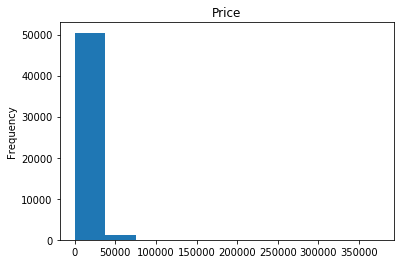

In [60]:
vehicles['price'].plot(kind='hist', title='Price')

We can see that the price range is mostly lies under the 50000 mark, but few outliers prevent us from investigating this range on our histogram.

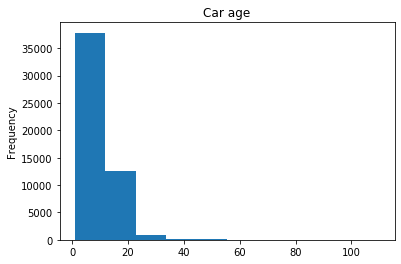

In [61]:
vehicles['car_age'].plot(kind='hist', title='Car age')

Age of the most cars do not exceed 20 years, so we need to close up to increase the readability of the histogram.

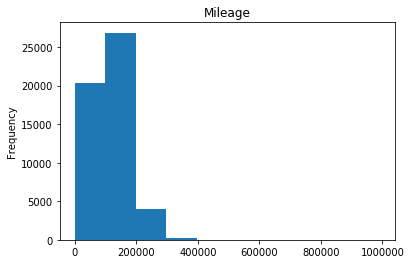

In [62]:
vehicles['odometer'].plot(kind='hist', title='Mileage')

Same as in the previous histograms we have outliers, whereas the most common mileage is between 0 and 200000.

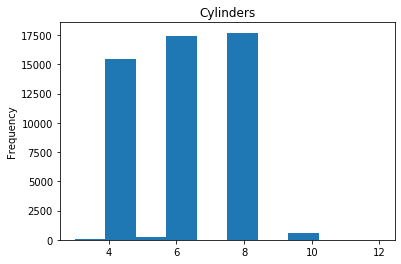

In [63]:
vehicles['cylinders'].plot(kind='hist', title='Cylinders')

Histogram for cylinders seems reliable, with no suspicious outliers.

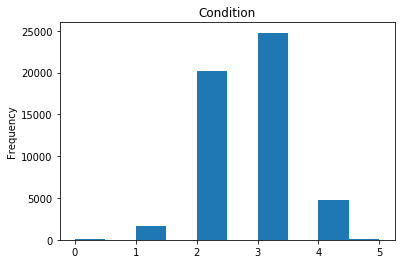

In [64]:
vehicles['condition'].plot(kind='hist', title='Condition')

Histogram for condition has no outliers and is in an accordance with the data.

### Filtered data

We will investigate the outliers for all parameters of interest using boxplots and then write filtered data into the new data frame.

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64


(0, 35000)

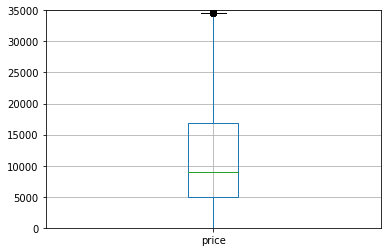

In [65]:
print(vehicles['price'].describe())
vehicles.boxplot(column='price')
plt.ylim(0,35000)

In [66]:
vehicles_filt=vehicles.query('price<=35000')

count    50111.000000
mean         8.621660
std          6.007409
min          1.000000
25%          4.000000
50%          8.000000
75%         12.000000
max        110.000000
Name: car_age, dtype: float64


(0, 25)

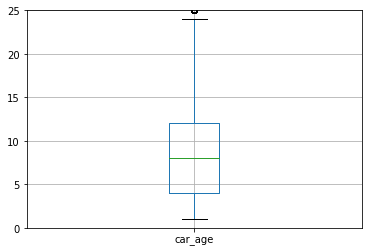

In [67]:
print(vehicles_filt['car_age'].describe())
vehicles_filt.boxplot(column='car_age')
plt.ylim(0,25)

In [68]:
vehicles_filt=vehicles_filt.query('car_age<=25')

count     49500.000000
mean     117772.354707
std       61203.426451
min           1.000000
25%       76220.000000
50%      115828.000000
75%      154000.000000
max      990000.000000
Name: odometer, dtype: float64


(0, 280000)

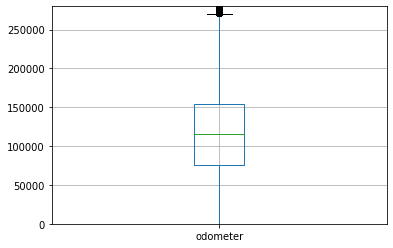

In [69]:
print(vehicles_filt['odometer'].describe())
vehicles_filt.boxplot(column='odometer')
plt.ylim(0,280000)

In [70]:
vehicles_filt=vehicles_filt.query('odometer<=280000')

count    48997.000000
mean         6.064126
std          1.656376
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64


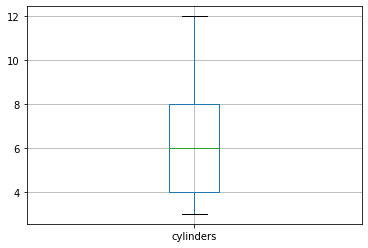

In [71]:
print(vehicles_filt['cylinders'].describe())
vehicles_filt.boxplot(column='cylinders')

count    48997.000000
mean         2.633100
std          0.700396
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64


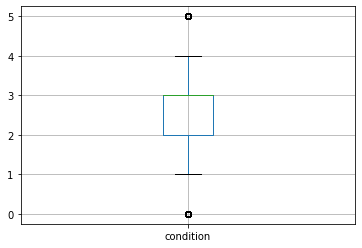

In [72]:
print(vehicles_filt['condition'].describe())
vehicles_filt.boxplot(column='condition')


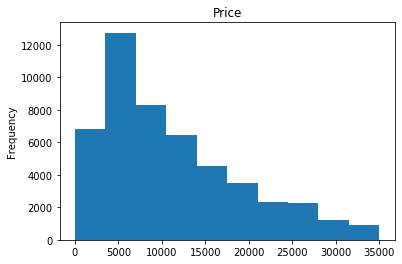

In [73]:
vehicles_filt['price'].plot(kind='hist', title='Price')    

Now, without the outliers, we can investigate the actual distribution of the prices. The peak is around 5000, the prices that are higer get more an more rare.

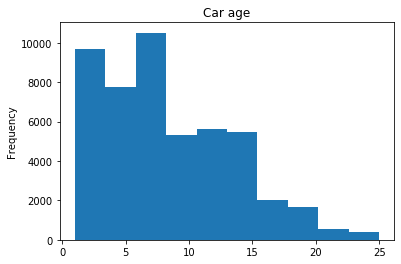

In [74]:
vehicles_filt['car_age'].plot(kind='hist', title='Car age')

Like with a price histogram now we can see that most cars are sold within the first 7 years after they've been prodused.

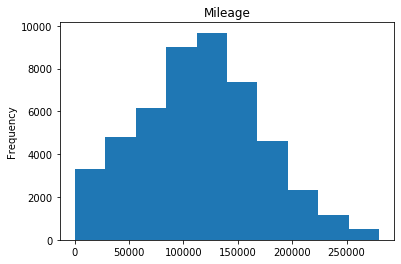

In [75]:
vehicles_filt['odometer'].plot(kind='hist', title='Mileage')

The peak for milerage lies around 125000, that's the most common point for lifetime of the car to be sold.

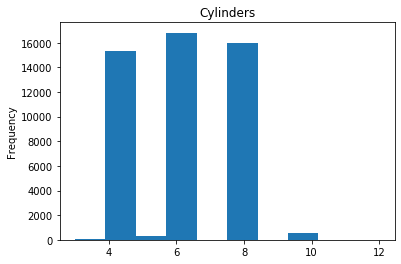

In [76]:
vehicles_filt['cylinders'].plot(kind='hist', title='Cylinders')

This histigram didn't have any outliers, we can tell that most car models have 4,6 or 8 cylinders.

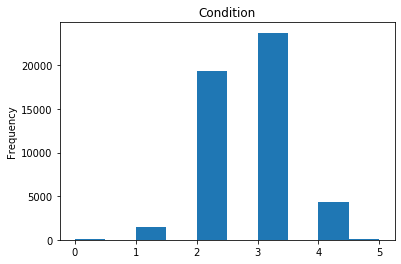

In [77]:
vehicles_filt['condition'].plot(kind='hist', title='Condition')

Here we can see that most people claim the condition of the car to be good or excelent, which makes sense since it's an ad and  they are trying to sell 5-years old car with the 125000 mileage.

### Ads

The median for the days listed is 33.0
count    48997.000000
mean        39.526277
std         28.186661
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64


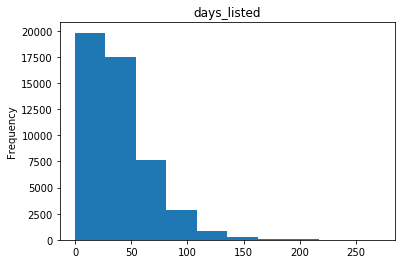

In [78]:
vehicles_filt['days_listed'].plot(kind='hist', title='days_listed')
print('The median for the days listed is',vehicles_filt['days_listed'].median())
print(vehicles_filt['days_listed'].describe())

(0, 105)

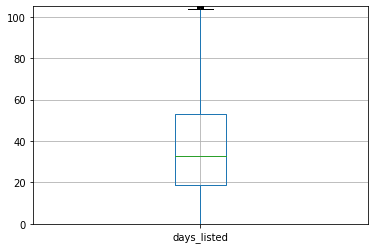

In [79]:
vehicles_filt.boxplot(column='days_listed')
plt.ylim(0,105)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4fc3f26850>]],
      dtype=object)

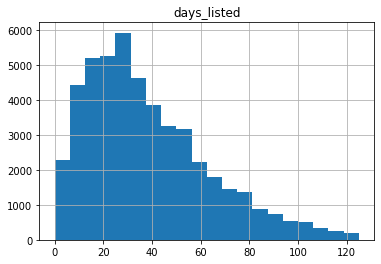

In [80]:
vehicles_filt.hist('days_listed', bins=20, range=(0,125))

Mean and median values of the days listed doesn't differ much. We can conclude that typicaly the car is sold in a month.
We can also consider the time less then 5 days of putting down the ad to be abnormally small.
And the time above 105 days to be abnormally long.

The number of ads and the average price for each type of vehicle:


In [81]:
vehicles_type = vehicles_filt.pivot_table(index='type',values ='price', aggfunc=('count','mean'))
print(vehicles_type.sort_values(by='mean', ascending = False))

               count          mean
type                              
bus             23.0  17445.913043
truck        11324.0  15204.983045
pickup        6439.0  15060.857431
offroad        187.0  14388.058824
coupe         2059.0  13505.031569
convertible    359.0  12760.529248
van            625.0  10531.702400
SUV          12010.0  10484.034638
other          238.0  10447.113445
wagon         1510.0   9002.566225
mini-van      1151.0   8028.396177
sedan        12058.0   6961.990131
hatchback     1014.0   6823.960552


As expected the most expensive type of cars are the big ones, and the ones with specific purposes, like buses, trucks, etc.
The cars for people to use in the city in their everyday life are the least expensive.

               count          mean
type                              
sedan        12058.0   6961.990131
SUV          12010.0  10484.034638
truck        11324.0  15204.983045
pickup        6439.0  15060.857431
coupe         2059.0  13505.031569
wagon         1510.0   9002.566225
mini-van      1151.0   8028.396177
hatchback     1014.0   6823.960552
van            625.0  10531.702400
convertible    359.0  12760.529248
other          238.0  10447.113445
offroad        187.0  14388.058824
bus             23.0  17445.913043


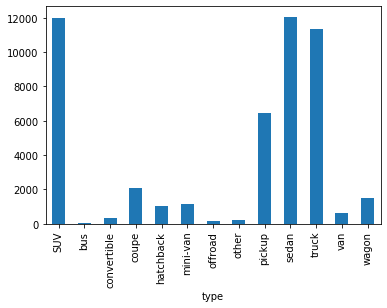

In [82]:
print(vehicles_type.sort_values(by='count', ascending = False))
vehicles_type['count'].plot(kind='bar')

The most popular cars to be sold are sedans and SUVs.

### Price Factors

#### Car age

-0.6047486915564263


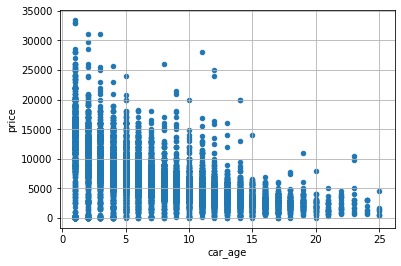

In [83]:
print(vehicles_filt.query('type=="sedan"')['car_age'].corr(vehicles_filt.query('type=="sedan"')['price']))
vehicles_filt.query('type=="sedan"').plot(x='car_age',y='price', kind='scatter',grid=True)

-0.5711844961356634


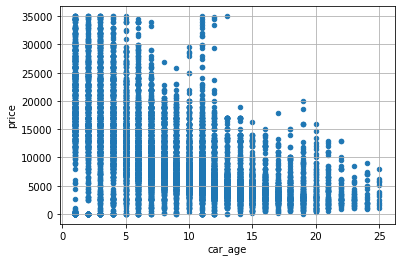

In [84]:
print(vehicles_filt.query('type=="SUV"')['car_age'].corr(vehicles_filt.query('type=="SUV"')['price']))
vehicles_filt.query('type=="SUV"').plot(x='car_age',y='price', kind='scatter',grid=True)

Pearson correlation coefficient for the price-age correlation is around -0.6 for the most popular types of cars, which is a significant  correlation.
As expected as the car age increases the car price decreases.

#### Mileage

-0.5587781758827389


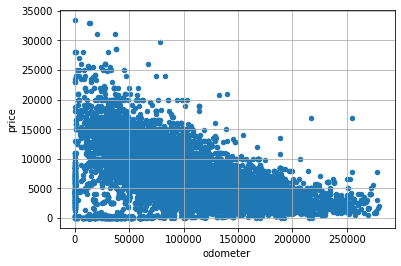

In [85]:
print(vehicles_filt.query('type=="sedan"')['odometer'].corr(vehicles_filt.query('type=="sedan"')['price']))
vehicles_filt.query('type=="sedan"').plot(x='odometer',y='price', kind='scatter',grid=True)

-0.5264064560755072


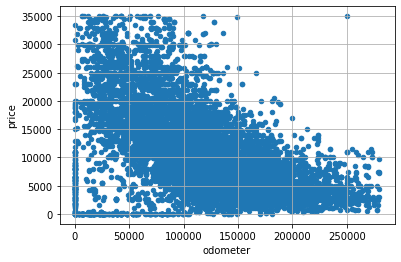

In [86]:
print(vehicles_filt.query('type=="SUV"')['odometer'].corr(vehicles_filt.query('type=="SUV"')['price']))
vehicles_filt.query('type=="SUV"').plot(x='odometer',y='price', kind='scatter',grid=True)

Pearson correlation coefficient for the price-mileage correlation is around -0.55, therefore big mileage decreases the price of the vehicle.

#### Condition

0.2948143441786405


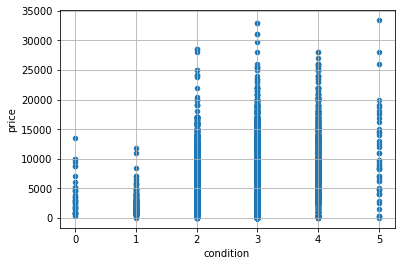

In [87]:
print(vehicles_filt.query('type=="sedan"')['condition'].corr(vehicles_filt.query('type=="sedan"')['price']))
vehicles_filt.query('type=="sedan"').plot(x='condition',y='price', kind='scatter',grid=True)

0.26410237210719006


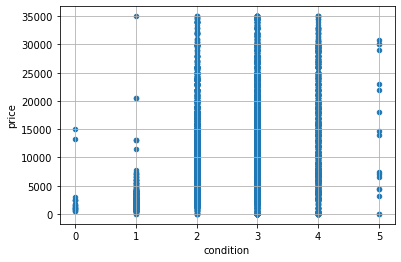

In [88]:
print(vehicles_filt.query('type=="SUV"')['condition'].corr(vehicles_filt.query('type=="SUV"')['price']))
vehicles_filt.query('type=="SUV"').plot(x='condition',y='price', kind='scatter',grid=True)

The condition is a parameter that people put themselves, in reality it's a parameter that is affected by many factors. In this case we don't see a strong correlation, since most people claim the car to be in relatively good condition, but the price is probably affected more by some more objective parameters.

#### Transmission

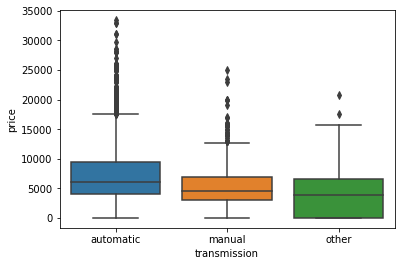

In [89]:
sns.boxplot(x="transmission", y="price", data=vehicles_filt.query('type=="sedan"'))

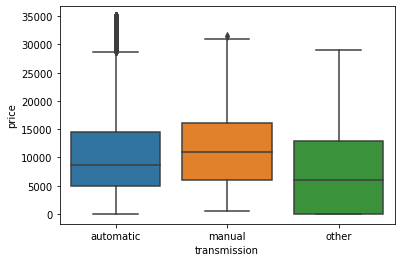

In [90]:
sns.boxplot(x="transmission", y="price", data=vehicles_filt.query('type=="SUV"'))

How the type of transmission is affecting the price depends on the type of the car. We can assume those car models that are meant for a city more often have an automatic transmission, it's more suitable and therefore more pricey. The cars for trips outside the city seem to be more valuable with the manual transmission.

#### Color

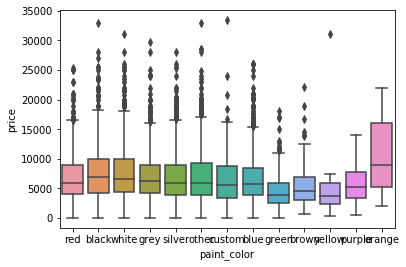

In [91]:
sns.boxplot(x="paint_color", y="price", data=vehicles_filt.query('type=="sedan"'))

              count          mean
paint_color                      
orange          9.0  10593.888889
black        1761.0   7531.863714
white        1498.0   7439.207610
grey         1617.0   7065.575758
red           937.0   6973.792956
other        2171.0   6928.154307
silver       2039.0   6841.288377
blue         1221.0   6563.214578
custom        298.0   6450.855705
purple         24.0   5990.500000
brown         257.0   5211.575875
yellow         21.0   5087.238095
green         205.0   4726.234146


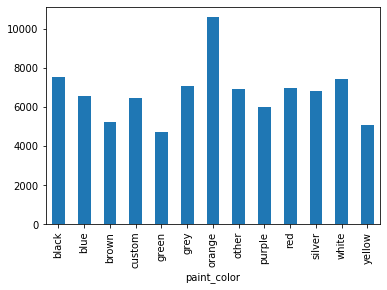

In [92]:
sedan_color=vehicles_filt.loc[vehicles_filt['type']=='sedan'].pivot_table(index='paint_color',values='price',aggfunc=('count','mean'))
print(sedan_color.sort_values(by='mean',ascending=False))
sedan_color['mean'].plot(kind='bar')

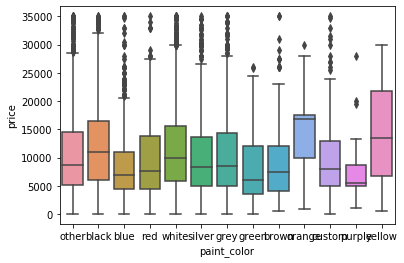

In [93]:
sns.boxplot(x="paint_color", y="price", data=vehicles_filt.query('type=="SUV"'))

              count          mean
paint_color                      
orange         81.0  15041.222222
yellow         45.0  14218.800000
black        2113.0  12093.616659
white        1885.0  11470.905040
other        2162.0  10557.343663
grey         1155.0  10420.601732
silver       1539.0   9902.296296
red           880.0   9632.638636
custom        302.0   9290.519868
brown         357.0   8696.386555
blue         1025.0   8480.412683
green         427.0   8010.971897
purple         39.0   7128.717949


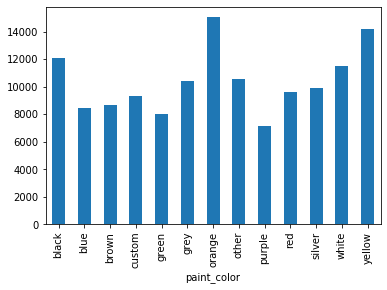

In [94]:
suv_color=vehicles_filt.loc[vehicles_filt['type']=='SUV'].pivot_table(index='paint_color',values='price',aggfunc=('count','mean'))
print(suv_color.sort_values(by='mean',ascending=False))
suv_color['mean'].plot(kind='bar')

For some reason, orange cars are the most expensive ones. However, the deviation in prices between cars of different colours is not very significant.

### Conclusion

1. We investigated outliers in our data for the following parameters: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition. We defined values that affected the readability of our histograms and filtered data accordingly. Looking at filtered data we could see the most common characteristics for the cars in ads.
2. We draw a conclusion of the typical lifetime of an ad.
3. Using data about two the most popular types of vehicles we found out the factors that impact the price most among age, mileage, condition, transmission type, and color. 

## Overall conclusion

In this project, we made a research on the free advertisements for vehicles that were published on a website. The data consisted of the information given in the ad. After the preprocessing of the data, getting rid of the missing values, we were able to calculate new parameters that were crucial for our research, such as car age.
We investigated correlations between the price and different parameters that were included in the ads.
Based on our research we can tell that car age affects the price of the car the most, it is closely followed by the mileage.
Other parameters are less universal: the transmission would slightly affect the price depending on the type of the car, and the colour has almost no impact on the price.